In [1]:
import pandas as pd
df=pd.read_csv("/kaggle/input/amzn-dpz-btc-ntfx-adjusted-may-2013may2019/portfolio_data.csv")
print(df.head(5))

       Date        AMZN        DPZ         BTC       NFLX
0  5/1/2013  248.229996  51.190983  106.250000  30.415714
1  5/2/2013  252.550003  51.987320   98.099998  30.641428
2  5/3/2013  258.049988  52.446388  112.900002  30.492857
3  5/6/2013  255.720001  53.205257  109.599998  30.098572
4  5/7/2013  257.730011  54.151505  113.199997  29.464285


In [2]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6

In [3]:
print(df.isna().sum())

Date    0
AMZN    0
DPZ     0
BTC     0
NFLX    0
dtype: int64


In [4]:
print(df.describe())

              AMZN          DPZ           BTC         NFLX
count  1520.000000  1520.000000   1520.000000  1520.000000
mean    821.541810   146.771695   2421.465669   147.668273
std     518.442653    72.192287   3310.894199   107.641486
min     248.229996    51.190983     69.660004    29.464285
25%     364.360001    84.993593    340.904999    62.851071
50%     686.459992   127.168053    625.304993   104.000000
75%    1121.287536   202.454994   3874.912415   192.207496
max    2039.510010   298.635986  18972.320310   418.970001


In [5]:
from datetime import datetime
df['Date']=pd.to_datetime(df['Date'],infer_datetime_format=True)
indexeddataset=df.set_index('Date')
indexeddataset.head(5)

/tmp/ipykernel_134/1566535764.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date']=pd.to_datetime(df['Date'],infer_datetime_format=True)


,AMZN,DPZ,BTC,NFLX
Date,,,,
2013-05-01,248.229996,51.190983,106.250000,30.415714
2013-05-02,252.550003,51.987320,98.099998,30.641428
2013-05-03,258.049988,52.446388,112.900002,30.492857
2013-05-06,255.720001,53.205257,109.599998,30.098572
2013-05-07,257.730011,54.151505,113.199997,29.464285


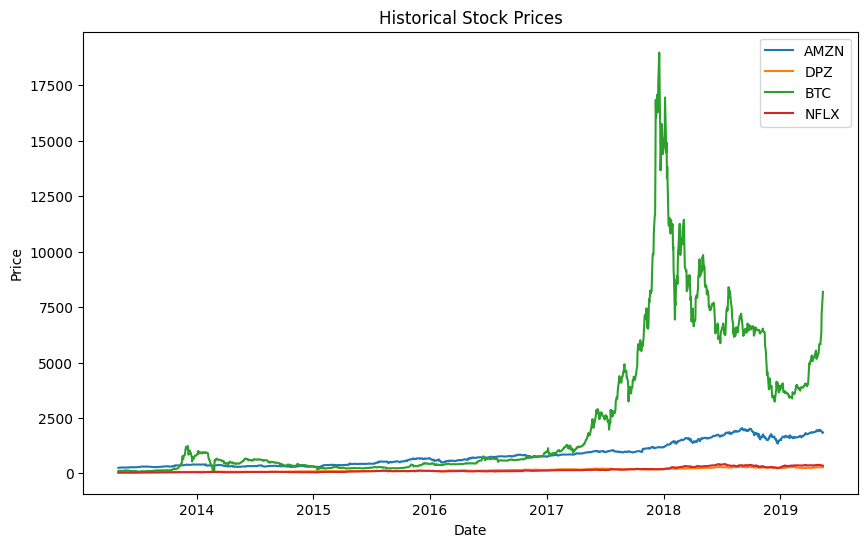

In [6]:
plt.figure(figsize=(10, 6))
for column in indexeddataset.columns:
    plt.plot(indexeddataset.index, indexeddataset[column], label=column)
plt.title('Historical Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

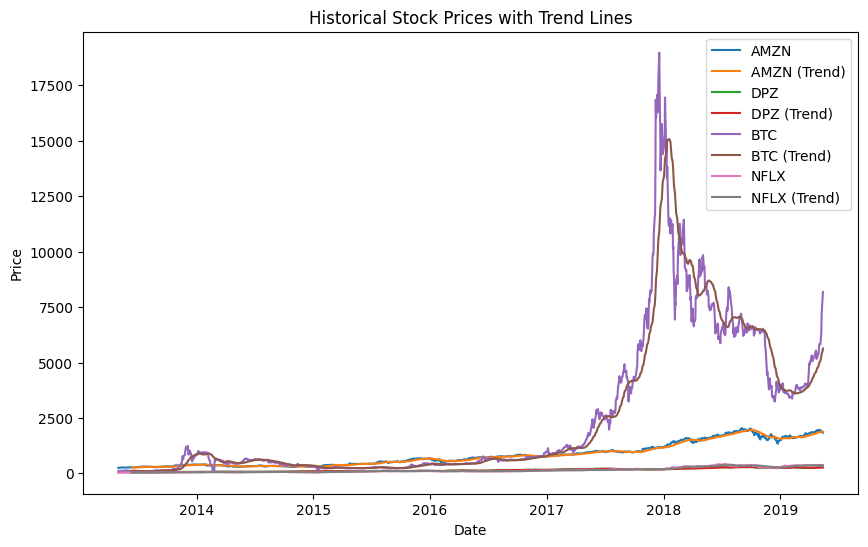

In [7]:
import seaborn as sns
plt.figure(figsize=(10, 6))
for column in indexeddataset.columns:
    sns.lineplot(data=indexeddataset[column], label=column)
    sns.lineplot(data=indexeddataset[column].rolling(window=30).mean(), label=f'{column} (Trend)')
plt.title('Historical Stock Prices with Trend Lines')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

/tmp/ipykernel_134/2885649369.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sns.lineplot(data=indexeddataset.resample('M').mean())  # Resample data to monthly frequency
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


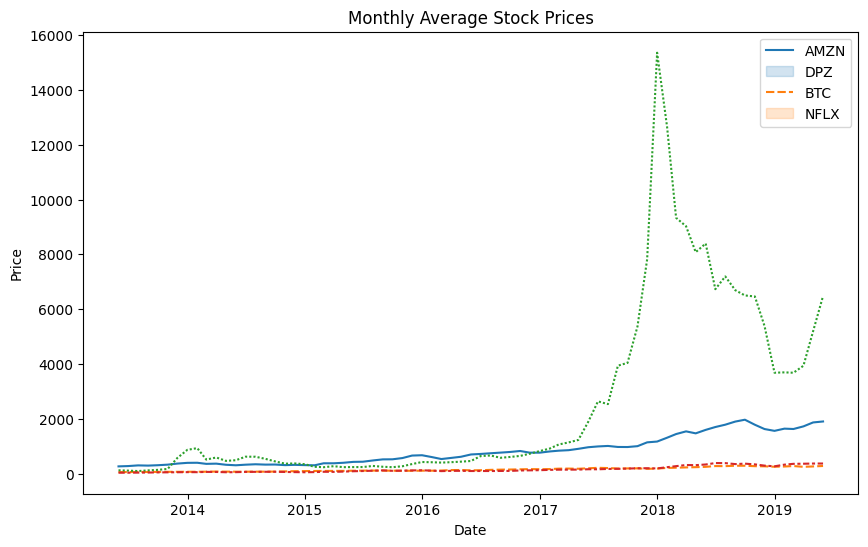

In [8]:
# Plotting at different time frequencies to detect seasonality
plt.figure(figsize=(10, 6))
sns.lineplot(data=indexeddataset.resample('M').mean())  # Resample data to monthly frequency
plt.title('Monthly Average Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(indexeddataset.columns)
plt.show()

In [9]:
df_amzn = df[['Date', 'AMZN']].copy()
df_dpz = df[['Date', 'DPZ']].copy()
df_btc = df[['Date', 'BTC']].copy()
df_nflx = df[['Date', 'NFLX']].copy()

df_amzn.set_index('Date',inplace=True)
df_dpz.set_index('Date', inplace=True)
df_btc.set_index('Date', inplace=True)
df_nflx.set_index('Date', inplace=True)

print("AMZN Dataset:")
print(df_amzn.head(2))
print("\nDPZ Dataset:")
print(df_dpz.head(2))
print("\nBTC Dataset:")
print(df_btc.head(2))
print("\nNFLX Dataset:")
print(df_nflx.head(2))

AMZN Dataset:
                  AMZN
Date                  
2013-05-01  248.229996
2013-05-02  252.550003

DPZ Dataset:
                  DPZ
Date                 
2013-05-01  51.190983
2013-05-02  51.987320

BTC Dataset:
                   BTC
Date                  
2013-05-01  106.250000
2013-05-02   98.099998

NFLX Dataset:
                 NFLX
Date                 
2013-05-01  30.415714
2013-05-02  30.641428


In [10]:
mean1=df_amzn['AMZN'].rolling(window=12).mean()
std1=df_amzn['AMZN'].rolling(window=12).std()
print(mean1,std1)

Date
2013-05-01            NaN
2013-05-02            NaN
2013-05-03            NaN
2013-05-06            NaN
2013-05-07            NaN
                 ...     
2019-05-08    1925.622508
2019-05-09    1923.630839
2019-05-10    1922.650004
2019-05-13    1916.019175
2019-05-14    1906.810008
Name: AMZN, Length: 1520, dtype: float64 Date
2013-05-01          NaN
2013-05-02          NaN
2013-05-03          NaN
2013-05-06          NaN
2013-05-07          NaN
                ...    
2019-05-08    20.857248
2019-05-09    22.151200
2019-05-10    23.431713
2019-05-13    37.037712
2019-05-14    41.159097
Name: AMZN, Length: 1520, dtype: float64


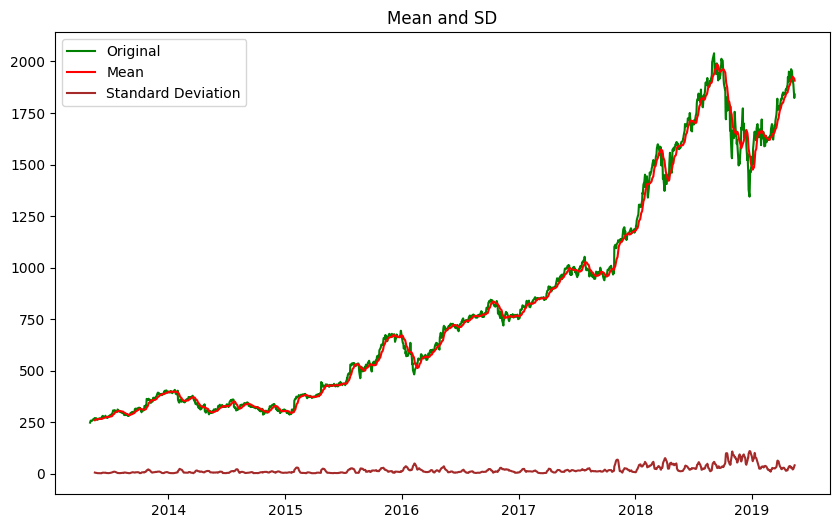

In [11]:
#rolling statistics
original=plt.plot(df_amzn['AMZN'], color='green', label='Original')
mean_1=plt.plot(mean1,color='red',label='Mean')
std_1=plt.plot(std1, color='brown',label='Standard Deviation')
plt.legend(loc='best')
plt.title('Mean and SD')
plt.show(block=False)

In [12]:
#dickey_fuller test
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df_amzn['AMZN'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','Lags used','No of observations used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]=value
print(dfoutput)

Test Statistic                0.553660
p-value                       0.986416
Lags used                    24.000000
No of observations used    1495.000000
Critical Value (1%)          -3.434732
Critical Value (5%)          -2.863475
Critical Value (10%)         -2.567800
dtype: float64


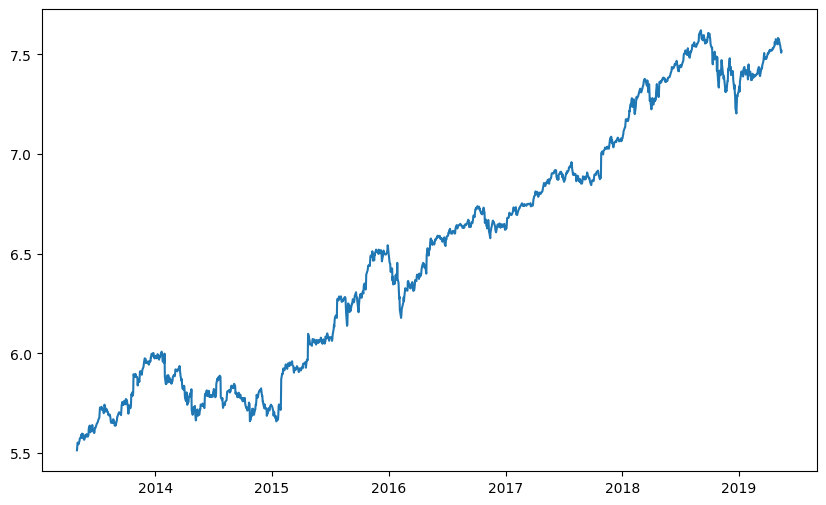

In [13]:
#estimating trend
df_amzn_logscale= np.log(df_amzn)
plt.plot(df_amzn_logscale)

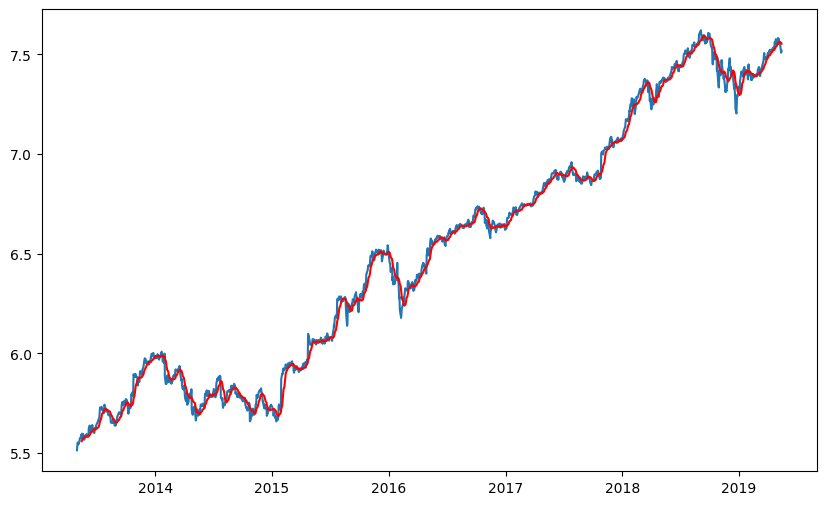

In [14]:
moving_average = df_amzn_logscale.rolling(window=12).mean()
moving_std= df_amzn_logscale.rolling(window=12).std()
plt.plot(df_amzn_logscale)
plt.plot(moving_average, color='red')

In [15]:
a=df_amzn_logscale-moving_average
a.head(12)

,AMZN
Date,
2013-05-01,NaN
2013-05-02,NaN
2013-05-03,NaN
2013-05-06,NaN
2013-05-07,NaN
2013-05-08,NaN
2013-05-09,NaN
2013-05-10,NaN
2013-05-13,NaN


In [16]:
#removing nan values
a.dropna(inplace=True)
a.head(10)

,AMZN
Date,
2013-05-16,0.016516
2013-05-17,0.031189
2013-05-20,0.017910
2013-05-21,0.019076
2013-05-22,-0.005440
2013-05-23,-0.011166
2013-05-24,-0.012375
2013-05-28,0.006354
2013-05-29,-0.000851


In [17]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    mean1=timeseries.rolling(window=12).mean()
    std1=timeseries.rolling(window=12).std()
    
    #rolling statistics
    original=plt.plot(timeseries, color='green', label='Original')
    mean_1=plt.plot(mean1,color='red',label='Mean')
    std_1=plt.plot(std1, color='brown',label='Standard Deviation')
    plt.legend(loc='best')
    plt.title('Mean and SD')
    plt.show(block=False)
    
    dftest = adfuller(timeseries['AMZN'], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags used','No of observations used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]=value
    print(dfoutput)

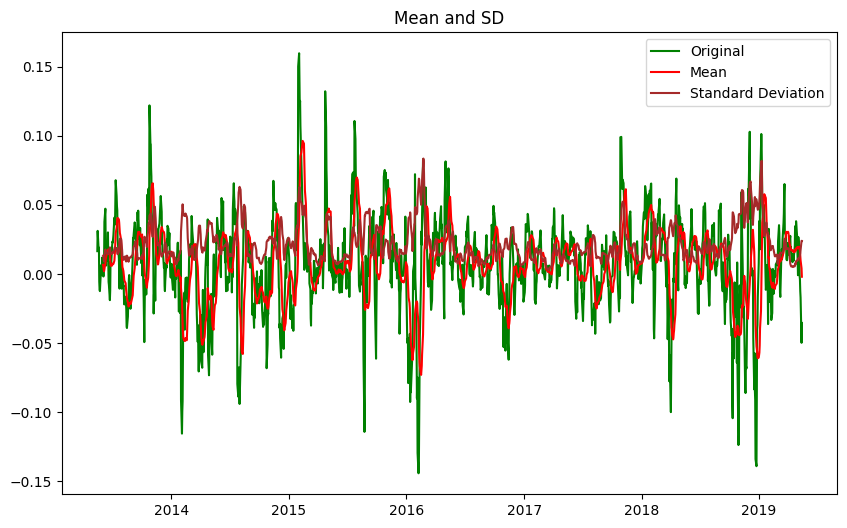

Test Statistic            -1.157976e+01
p-value                    2.962447e-21
#Lags used                 7.000000e+00
No of observations used    1.501000e+03
Critical Value (1%)       -3.434714e+00
Critical Value (5%)       -2.863467e+00
Critical Value (10%)      -2.567796e+00
dtype: float64


In [18]:
test_stationarity(a)

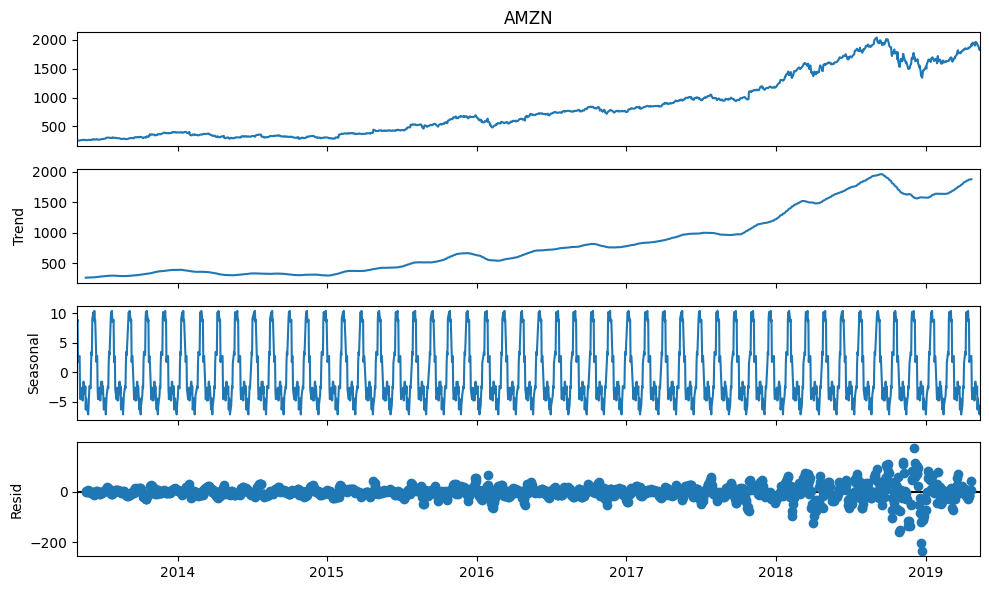

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_amzn['AMZN'], model='additive', period=30)  # Assuming a seasonal period of 30
decomposition.plot()
plt.show()

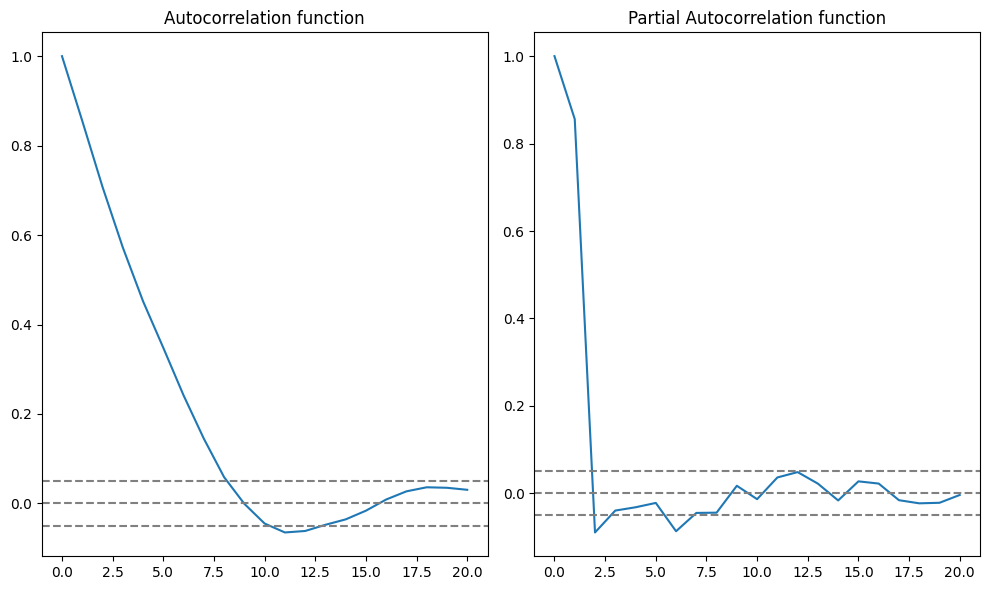

In [20]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf=acf(a,nlags=20)
lag_pacf=pacf(a,nlags=20)

#plot acf
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(a)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(a)),linestyle='--',color='gray')
plt.title('Autocorrelation function')

#plot pacf
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(a)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(a)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation function')
plt.tight_layout()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(df_amzn_logscale, order=(10,1,2))
results = model.fit()

# Make predictions
fitted_values = results.fittedvalues

# Plot original data and fitted values
plt.plot(a, label='Original')
plt.plot(fitted_values, color='red', label='Fitted Values')
#plt.title('ARIMA Model Fit RSS: %.4' % sum((results.fittedvalues-df_shifting['AMZN'])**2))
plt.legend()
plt.show()


In [ ]:
#ma model
model = ARIMA(df_amzn_logscale, order=(10,1,0))
results = model.fit()

# Make predictions
fitted_values = results.fittedvalues

# Plot original data and fitted values
plt.plot(a, label='Original')
plt.plot(fitted_values, color='red', label='Fitted Values')
#plt.title('ARIMA Model Fit RSS: %.4' % sum((results.fittedvalues-df_shifting['AMZN'])**2))
plt.legend()
plt.show()

In [23]:
prediction_arima_diff=pd.Series(results.fittedvalues,copy=True)
print(prediction_arima_diff.head(5))

Date
2013-05-01    0.000000
2013-05-02    5.514356
2013-05-03    5.531825
2013-05-06    5.552941
2013-05-07    5.542808
dtype: float64


In [24]:
cumsum=prediction_arima_diff.cumsum()
print(cumsum.head(5))

Date
2013-05-01     0.000000
2013-05-02     5.514356
2013-05-03    11.046180
2013-05-06    16.599121
2013-05-07    22.141929
dtype: float64


In [25]:
log = pd.Series(df_amzn_logscale['AMZN'].iloc[0], index=df_amzn_logscale.index)
log = log.add(cumsum, fill_value=0)
log.head()

Date
2013-05-01     5.514356
2013-05-02    11.028711
2013-05-03    16.560536
2013-05-06    22.113477
2013-05-07    27.656285
dtype: float64

In [ ]:
import matplotlib.pyplot as plt

# Assuming df_amzn contains your original data and predictions_arima contains your ARIMA predictions
plt.plot(df_amzn.index, df_amzn, label='Original Data')
plt.plot(df_amzn.index, log, label='ARIMA Predictions')
plt.xlabel('Date')  # Assuming your index represents dates
plt.ylabel('Value')  # Update with appropriate label
plt.title('Original Data vs ARIMA Predictions')
plt.legend()
plt.show()


In [29]:
df_amzn_logscale

,AMZN
Date,
2013-05-01,5.514356
2013-05-02,5.531609
2013-05-03,5.553153
2013-05-06,5.544083
2013-05-07,5.551913
...,...
2019-05-08,7.558918
2019-05-09,7.549541
2019-05-10,7.544322


In [30]:
# Forecast future values
forecast_values = results.forecast(steps=120)
forecast_values

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


1520    7.517825
1521    7.519085
1522    7.519685
1523    7.517432
1524    7.517873
          ...   
1635    7.518326
1636    7.518326
1637    7.518326
1638    7.518326
1639    7.518326
Name: predicted_mean, Length: 120, dtype: float64